In [12]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import math

In [13]:
data = pd.read_excel("C:/Users/vikas/Downloads/yahoo_data.xlsx")
print(data)


              Date      Open      High       Low     Close  Adj Close  \
0     Apr 28, 2023  33797.43  34104.56  33728.40  34098.16   34098.16   
1     Apr 27, 2023  33381.66  33859.75  33374.65  33826.16   33826.16   
2     Apr 26, 2023  33596.34  33645.83  33235.85  33301.87   33301.87   
3     Apr 25, 2023  33828.34  33875.49  33525.39  33530.83   33530.83   
4     Apr 24, 2023  33805.04  33891.15  33726.09  33875.40   33875.40   
...            ...       ...       ...       ...       ...        ...   
1253  May 07, 2018  24317.66  24479.45  24263.42  24357.32   24357.32   
1254  May 04, 2018  23865.22  24333.35  23778.87  24262.51   24262.51   
1255  May 03, 2018  23836.23  23996.15  23531.31  23930.15   23930.15   
1256  May 02, 2018  24097.63  24185.52  23886.30  23924.98   23924.98   
1257  May 01, 2018  24117.29  24117.29  23808.19  24099.05   24099.05   

         Volume  
0     354310000  
1     343240000  
2     321170000  
3     297880000  
4     252020000  
...         ...

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB
None


In [15]:
print(data.describe())


               Open          High           Low         Close     Adj Close  \
count   1258.000000   1258.000000   1258.000000   1258.000000   1258.000000   
mean   29595.823045  29776.945739  29402.432226  29599.361677  29599.361677   
std     4006.078299   4009.007573   4004.949066   4007.468822   4007.468822   
min    19028.360000  19121.010000  18213.650000  18591.930000  18591.930000   
25%    26041.267500  26163.155000  25877.872500  26027.120000  26027.120000   
50%    29201.410000  29335.685000  28996.500000  29199.460000  29199.460000   
75%    33604.027500  33825.445000  33346.827500  33600.342500  33600.342500   
max    36722.600000  36952.650000  36636.000000  36799.650000  36799.650000   

             Volume  
count  1.258000e+03  
mean   3.450636e+08  
std    1.069142e+08  
min    8.615000e+07  
25%    2.773125e+08  
50%    3.247250e+08  
75%    3.875100e+08  
max    9.159900e+08  


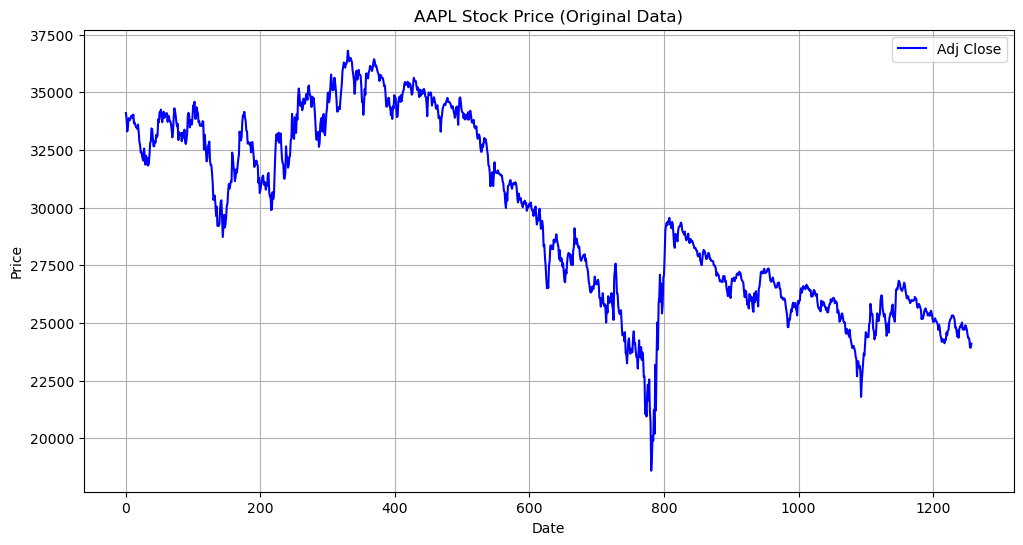

In [18]:
#a line plot to visualize the 'Adj Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Adj Close'], label='Adj Close', color='blue')
plt.title(f'{symbol} Stock Price (Original Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Preprocessing the data
data = data['Adj Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [20]:
# Spliting the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Creating a sequences and labels for the LSTM model
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [21]:
#  LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the  model
history=model.fit(X_train, y_train, epochs=50, batch_size=64)
 



Epoch 1/50
16/16 [==============================] - 2s 9ms/step - loss: 0.2583
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0329
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 4/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 5/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 8/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 9/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 10/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 11/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 12/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 13/50
16/16 [=============================

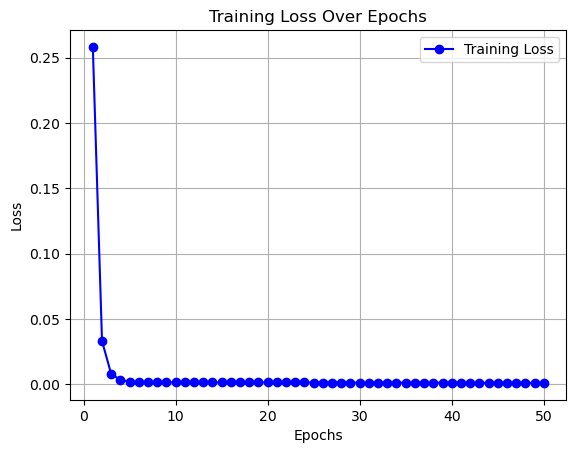

In [22]:
#Vizualize the loss trend during training
loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

# Plot the loss
plt.plot(epochs, loss_values, 'bo-', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

8/8 [==============================] - 0s 5ms/step


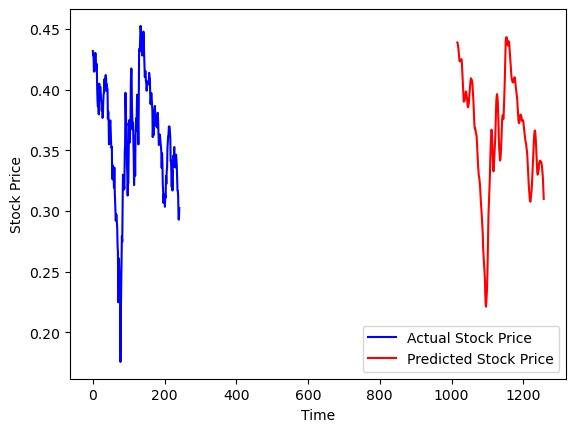

In [25]:
# Making predictions
predicted_stock_price = model.predict(X_test)
# Modify the code to ensure that predicted_stock_price has the same length as the testing data
predicted_stock_price = predicted_stock_price[:len(test_data)]

# Visualizing the results
plt.plot(data[train_size+sequence_length:], color='blue', label='Actual Stock Price')  # Use the correct range for actual data
plt.plot(np.arange(train_size+sequence_length, train_size+sequence_length+len(predicted_stock_price)), predicted_stock_price, color='red', label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [26]:
#Model evaluationn using root mean square
mse = mean_squared_error(data[train_size+sequence_length:], predicted_stock_price)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 0.0221
